# Import Packages

In [1]:
import numpy as np
import os,random,shutil
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

# Import Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define the classes and their corresponding labels
class_names = ['Spider Veins Dataset', 'Varicose Veins Dataset', 'normal legs']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

# Get the number of classes
nb_classes = len(class_names)

# Define the image size
IMAGE_SIZE = (224, 224)


In [4]:
import random,shutil

In [5]:
def split_data(source_dir, train_dir, test_dir, split_ratio=0.8):
    # Create train and test directories if they don't exist
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    # Walk through each folder in the source directory
    for folder_name in os.listdir(source_dir):
        folder_path = os.path.join(source_dir, folder_name)
        if os.path.isdir(folder_path):
            train_folder = os.path.join(train_dir, folder_name)
            test_folder = os.path.join(test_dir, folder_name)
            # Create train and test folders for the current class
            if not os.path.exists(train_folder):
                os.makedirs(train_folder)
            if not os.path.exists(test_folder):
                os.makedirs(test_folder)
            # List all files in the current class folder
            files = os.listdir(folder_path)
            # Calculate the number of files to move to the test set
            num_test_files = int(len(files) * (1 - split_ratio))
            # Randomly select files for the test set
            test_files = random.sample(files, num_test_files)
            # Move the selected files to the test folder
            for file_name in test_files:
                src_file = os.path.join(folder_path, file_name)
                dst_file = os.path.join(test_folder, file_name)
                shutil.copy(src_file, dst_file)
            # Move the remaining files to the train folder
            for file_name in os.listdir(folder_path):
                src_file = os.path.join(folder_path, file_name)
                dst_file = os.path.join(train_folder, file_name)
                shutil.copy(src_file, dst_file)

# usage
source_directory = "/content/drive/MyDrive/Data Set New"
train_directory = "/train_directory"
test_directory = "/test_directory"

split_data(source_directory, train_directory, test_directory)

In [6]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Define the function to load data
def load_data():
    # Define the directories for training and testing datasets
    datasets = ['/train_directory','/test_directory']
    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            # Assuming class_names_label is a dictionary mapping folder names to labels
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the image
                image = cv2.imread(img_path)

                # Convert the image to grayscale
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # Resize the image to the desired size
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        # Convert images and labels lists to numpy arrays
        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')

        # Append the images and labels tuple to the output list
        output.append((images, labels))

    return output


In [7]:
!rm  "/train_directory/normal legs/10-shapelylegs.avif"
!rm  "/test_directory/normal legs/10-shapelylegs.avif"


In [8]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /train_directory


100%|██████████| 221/221 [00:01<00:00, 152.47it/s]


Loading /test_directory


100%|██████████| 44/44 [00:00<00:00, 215.38it/s]


In [9]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [10]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 473
Number of testing examples: 92
Each image is of size: (150, 150)


# Simple EDA

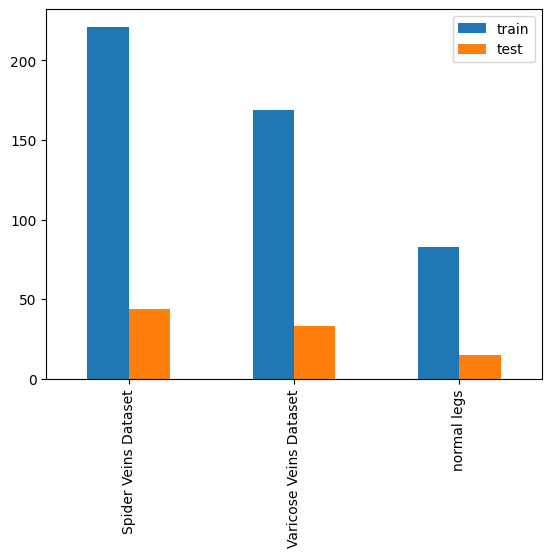

In [11]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

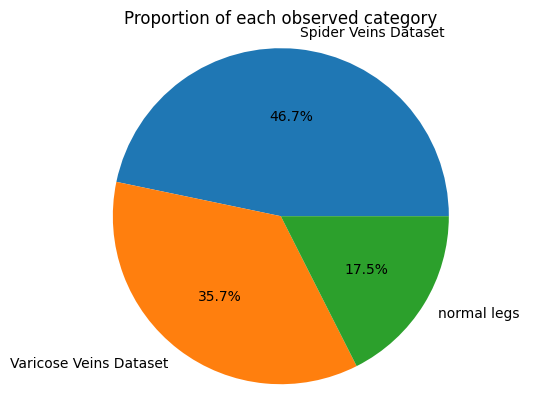

In [12]:
plt.pie(train_counts,
        explode=(0, 0, 0) ,
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

## Good practice: scale the data

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [14]:
test_images.shape

(92, 150, 150)

## Visualize the data
We can display a random image from the training set.

In [15]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """

    index = np.random.randint(images.shape[0])
    plt.figure()

    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

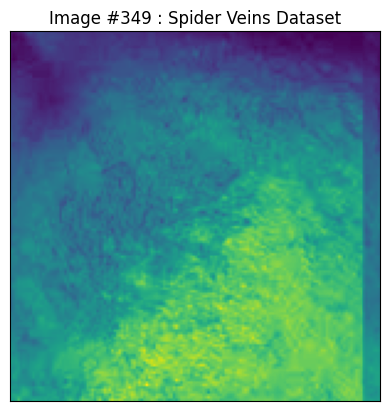

In [16]:
display_random_image(class_names, train_images, train_labels)

We can also display the first 25 images from the training set directly with a loop to get a better view

In [17]:
def display_examples(class_names, images, labels):

    fig = plt.figure(figsize=(18,18))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

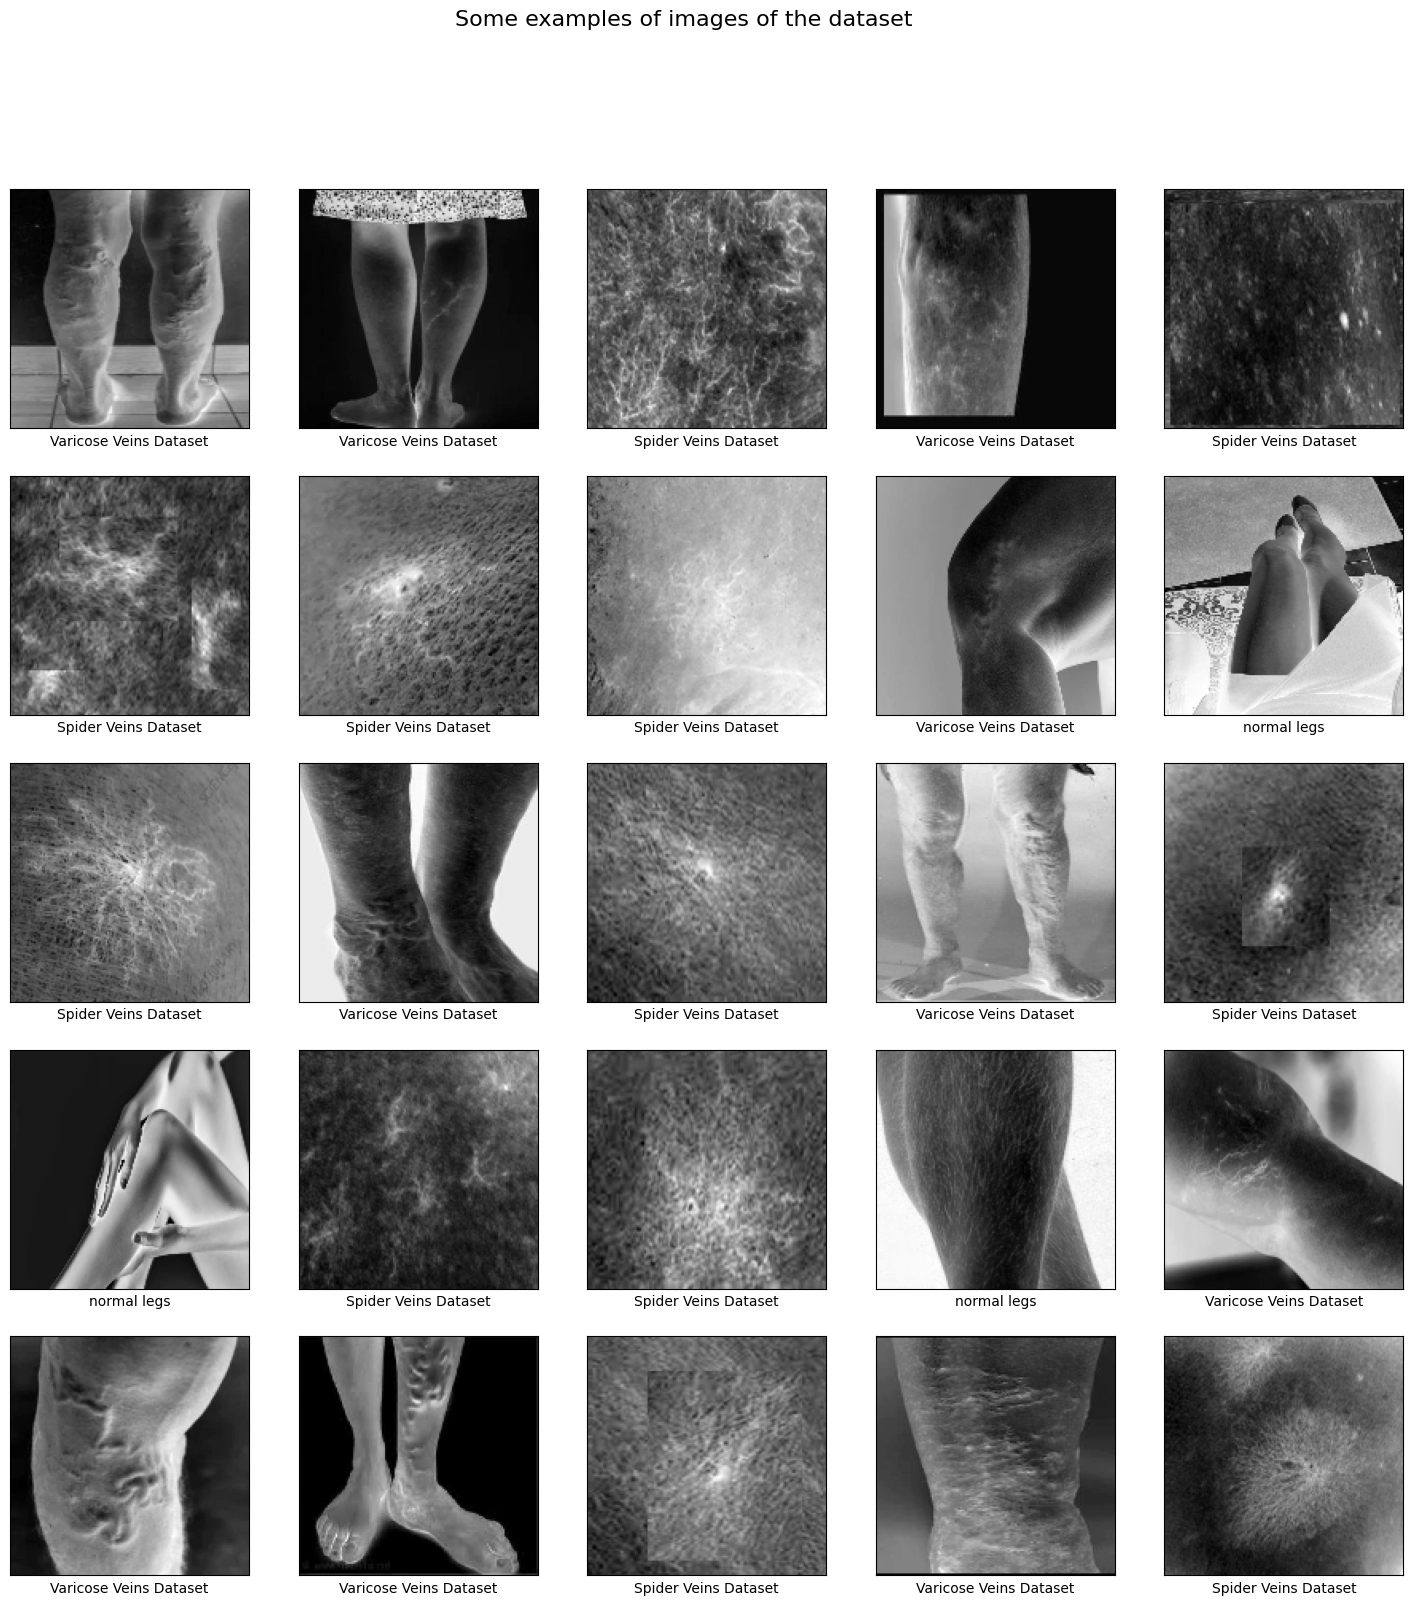

In [18]:
display_examples(class_names, train_images, train_labels)

# Model Creation

In [19]:


# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (IMAGE_SIZE[0],IMAGE_SIZE[0], 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Save the model
model.save('my_model.h5')


Epoch 1/20
15/15 [==============================] - 11s 224ms/step - loss: 1.0722 - accuracy: 0.4017 - val_loss: 1.0256 - val_accuracy: 0.4783
Epoch 2/20
15/15 [==============================] - 1s 64ms/step - loss: 1.0500 - accuracy: 0.4672 - val_loss: 1.0178 - val_accuracy: 0.4783
Epoch 3/20
15/15 [==============================] - 1s 61ms/step - loss: 0.9800 - accuracy: 0.5307 - val_loss: 0.8937 - val_accuracy: 0.5652
Epoch 4/20
15/15 [==============================] - 1s 63ms/step - loss: 0.7570 - accuracy: 0.6702 - val_loss: 0.5912 - val_accuracy: 0.7826
Epoch 5/20
15/15 [==============================] - 1s 61ms/step - loss: 0.7061 - accuracy: 0.7188 - val_loss: 0.7234 - val_accuracy: 0.7174
Epoch 6/20
15/15 [==============================] - 1s 58ms/step - loss: 0.6308 - accuracy: 0.7632 - val_loss: 0.5051 - val_accuracy: 0.8261
Epoch 7/20
15/15 [==============================] - 1s 56ms/step - loss: 0.4823 - accuracy: 0.7949 - val_loss: 0.3855 - val_accuracy: 0.8261
Epoch 8/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (IMAGE_SIZE[0],IMAGE_SIZE[0], 1)),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Dense(128, activation=tf.nn.relu),
#     tf.keras.layers.Dropout(0.2),

#     tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Dense(64, activation=tf.nn.relu),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(32, activation=tf.nn.relu),
#     tf.keras.layers.Dense(3, activation=tf.nn.softmax)
# ])

In [21]:
# # model compile
# model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])


In [22]:
# history = model.fit(train_images, train_labels, batch_size=128, epochs=30, validation_split = 0.2)

In [23]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

In [24]:
plot_accuracy_loss(history)

NameError: name 'history' is not defined

### # Evaluate the model on the test data

In [ ]:
# test_loss = model.evaluate(test_images, test_labels)

In [ ]:
# Making predictions on test images
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

# Displaying a random image along with its predicted label
display_random_image(class_names, test_images, pred_labels)


In [ ]:
# Save the model
model.save("model.h5")


# Prediction

In [ ]:
def load_data_prediction(file):
    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, IMAGE_SIZE)
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    return image

predictions = model.predict(load_data_prediction("path to img"))
pred_labels = np.argmax(predictions, axis = 1)
class_names[pred_labels[0]]
